<a href="https://colab.research.google.com/github/wshrikant/EDA_Population/blob/main/EDA_WORLD_POP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Dataset, we have Historical Population data for every Country/Territory in the world by different parameters like Area Size of the Country/Territory, Name of the Continent, Name of the Capital, Density, Population Growth Rate, Ranking based on Population, World Population Percentage, etc.


* Rank : Ranked particular country by population
* CCA3 : 3 digit country code.
* Country : Country name
*  Capital : Capital of Country
* Continent : Name of the Continent where the Country Belongs
* 2022 population :The Population of the Country in year 2022.
* 2020 population :The Population of the Country in year 2020.
* 2015 population :The Population of the Country in year 2015.
* 2010 population :The Population of the Country in year 2010.
* 2000 population :The Population of the Country in year 2000.
* 1990 population :The Population of the Country in year 1990.
* 1980 population :The Population of the Country in year 1980.
* 1970 population :The Population of the Country in year 1970.
* Area :The land area of the Country.
* Density :The Population Density of the Country.
* Growth Rate : The Population Growth Rate of the Country.
* World Population Percentage :The percentage of the World Population residing in that Country

In [32]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
# Loading the Dataset 
World_pop = pd.read_csv('/content/drive/MyDrive/Datawarehouse/WORLD_POPULATION/world_population.csv')

In [36]:
# Removing duplicates and check for null values 

World_pop.drop_duplicates(inplace=True)
World_pop.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [40]:
#check details of dataset
print(World_pop.shape)
print("\n")
print(World_pop.info())

(234, 17)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km

In [45]:
#sort dataset according to rank
wp_sorted = World_pop.sort_values("Rank")

In [47]:
#check top 10
wp_sorted.head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60


In [49]:
#grouppby continent and combine with 2022 population 
cont_pop= wp_sorted.groupby(["Continent"]).agg({"2022 Population":"sum"}).sort_values(["2022 Population"], ascending=False)
cont_pop.reset_index(inplace=True)

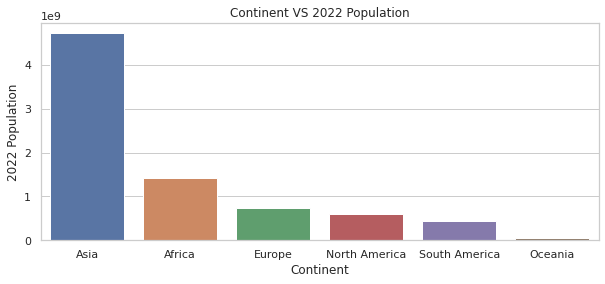

In [132]:
#plot bargraph to analyse continent vs population in 2022
plt.figure(figsize=(10, 4))
sns.barplot(x=cont_pop["Continent"], y=cont_pop["2022 Population"])
plt.title("Continent VS 2022 Population")
plt.xlabel('Continent')
plt.ylabel('2022 Population')
plt.show()

So, Asia is the one with the most population

In [64]:
#concat all year together and groupby with continent 
pop_years=["2022 Population","2020 Population","2015 Population","2010 Population","2000 Population","1990 Population","1980 Population","1970 Population"]
pop_trend = wp_sorted.groupby(["Continent"])[pop_years].sum()
pop_trend.reset_index(inplace=True)

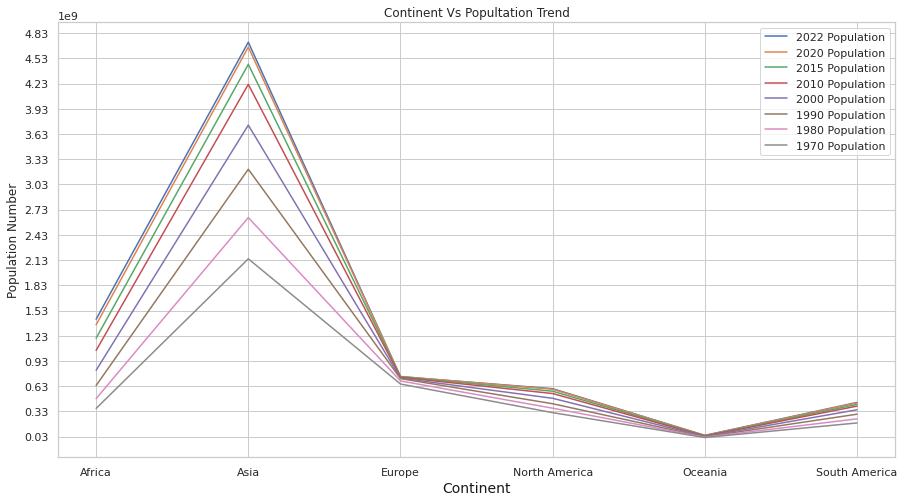

In [134]:
#plot linegraph to analyse continent vs population in diff years 
plt.figure(figsize=(15, 8))

for year in pop_years:
        sns.lineplot(x=pop_trend["Continent"], y=pop_trend[year])
        plt.legend(pop_years)

plt.title("Continent Vs Popultation Trend")
plt.xlabel('Continent', fontsize=14, c='k')
plt.ylabel("Population Number")
plt.yticks(np.arange(30000000, 5000000000, step=300000000))

plt.show()

So, Ocenia is the least growing continent , and as time goes population in all continents increases with somehow a fixed rate.
Asia , Africa , Europe , North America , South America , Ocenia.

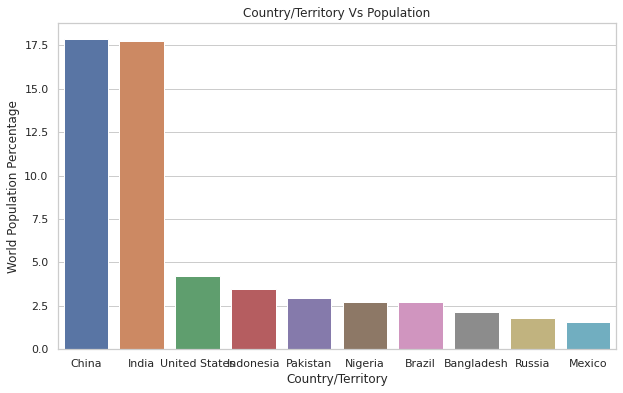

In [71]:
top_ten = wp_sorted.head(10)

#plot graph for top ten contries with world population percentage in that country 
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x=top_ten["Country/Territory"], y=top_ten["World Population Percentage"])
plt.title("Country/Territory Vs Population")
plt.xlabel('Country/Territory')
plt.ylabel('World Population Percentage')
plt.show()

So, China, India and USA tops in world population based on the percentage.

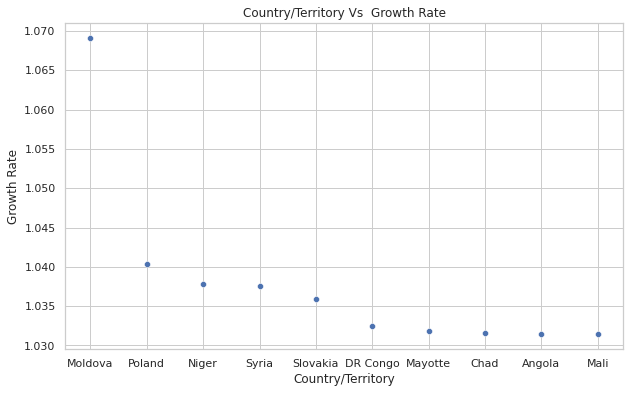

In [77]:
top_ten= wp_sortd.sort_values(["Growth Rate"], ascending=[False]).head(10)

#plot graph for top 10 contries with highest groth rate.
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(x=top_ten["Country/Territory"], y=top_ten["Growth Rate"])

plt.title("Country/Territory Vs  Growth Rate")
plt.xlabel('Country/Territory')
plt.ylabel('Growth Rate')
plt.show()

So, Moldova is dominating in the growth rate section. 

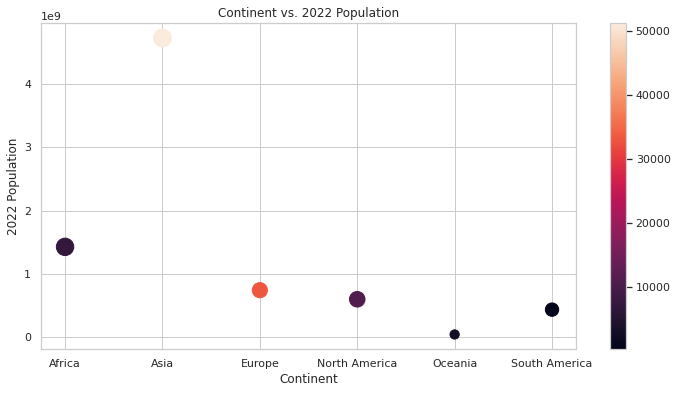

In [85]:
cont_info = wp_sortd.groupby(["Continent"]).agg({"2022 Population":"sum","Area (km²)":"sum","Density (per km²)":"sum"})
cont_info.reset_index(inplace=True)

#plot graph for continent with diff. parameters 
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=cont_info['Continent'], y=cont_info['2022 Population'], s=cont_info['Area (km²)']/100000, c=cont_info['Density (per km²)'])
plt.colorbar(sc)   
plt.xlabel('Continent')
plt.ylabel('2022 Population')
plt.title('Continent vs. 2022 Population')
plt.show()

Bigger circle == Area of the continent
Color of the circle == Density of the contient
We can say that Asia has the biggest circle , the darkest color and the most populated contient too.
Africa has the second biggest circle , bright color and the second most populated contient.
Europe has a small circle compared to the previous , Mid dark color which means that the density is somehow high comapred to Africa due to it's small area.

In [131]:
wp_sorted["ratio F2022t2020"] = wp_sorted["2022 Population"] / wp_sorted["2020 Population"]
wp_sorted["ratio F2020t2015"] = wp_sorted["2020 Population"] / wp_sorted["2015 Population"]
wp_sorted["ratio F1970t2022"] = wp_sorted["2022 Population"] / wp_sorted["1970 Population"]
wp_sorted

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,PerecentageF2015t2020,PerecentageF1970t2022,ration F2022t2020,ration F2022t2025,ration F1970t2022,ratio F2022t2020,ratio F2022t2025,ratio F1970t2022,ratio F2022t2015,ratio F2020t2015
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,...,1.022396,1.733529,1.000672,1.022396,1.733529,1.000672,1.022396,1.733529,1.022396,1.022396
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,...,1.055577,2.542009,1.014886,1.055577,2.542009,1.014886,1.055577,2.542009,1.055577,1.055577
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,...,1.034917,1.688677,1.006989,1.034917,1.688677,1.006989,1.034917,1.688677,1.034917,1.034917
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,...,1.049272,2.390915,1.013402,1.049272,2.390915,1.013402,1.049272,2.390915,1.049272,1.049272
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,...,1.076919,3.977423,1.037976,1.076919,3.977423,1.037976,1.076919,3.977423,1.076919,1.076919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,...,0.889504,0.385020,0.975556,0.889504,0.385020,0.975556,0.889504,0.385020,0.889504,0.889504
64,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,...,1.099472,1.662269,1.008807,1.099472,1.662269,1.008807,1.099472,1.662269,1.099472,1.099472
150,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,...,1.051435,0.372999,0.995881,1.051435,0.372999,0.995881,1.051435,0.372999,1.051435,1.051435
209,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,...,1.256534,1.091599,1.024083,1.256534,1.091599,1.024083,1.256534,1.091599,1.256534,1.256534


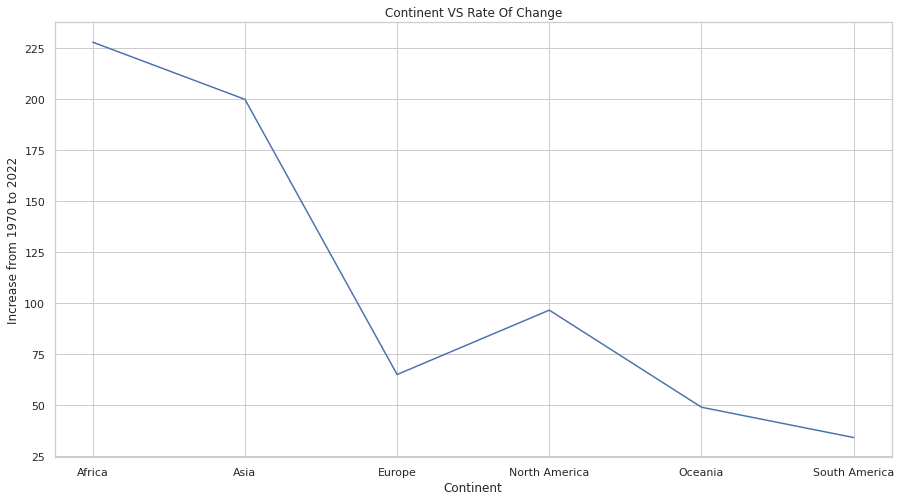

In [124]:
increase_70to22 = wp_sorted.groupby(["Continent"])[["ratio F1970t2022"]].sum()
increase_70to22.reset_index(inplace=True)

#plot for increase population from 190 to 2022
plt.figure(figsize=(15, 8))

sns.lineplot(x=increase_70to22["Continent"], y=increase_70to22["ratio F1970t2022"])

plt.title("Continent VS Rate Of Change")
plt.xlabel('Continent')
plt.ylabel("Increase from 1970 to 2022")

plt.show()

That percentage has been calculated from early 1970 to 2022
You may conclude that Africa has the highest percentage of growing population , Asia which is the highest in population has the most second percentage , North America , Europe , South America and Ocenia

       Continent  ratio F2022t2020  ratio F2022t2015
0         Africa         59.484063         63.863013
1           Asia         50.877537         53.291765
2         Europe         50.105511         50.610646
3  North America         40.349268         41.411890
4        Oceania         23.321090         23.867918
5  South America         14.228705         14.842317


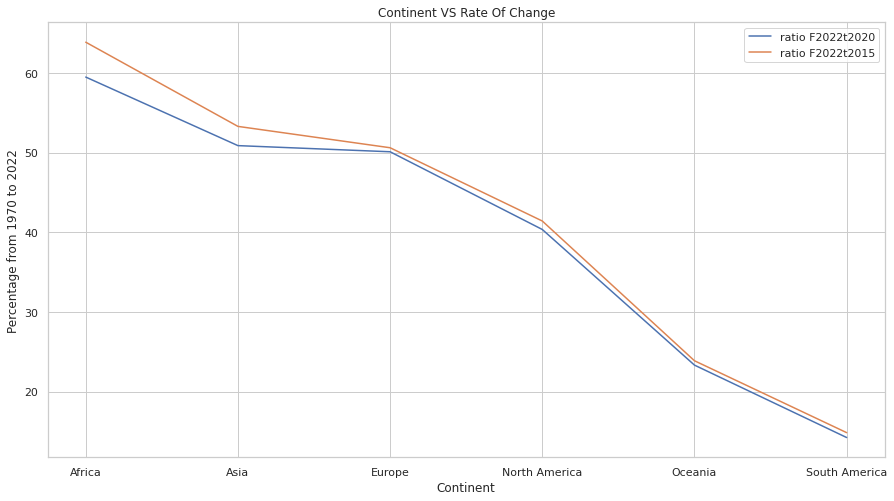

In [125]:
increase_20to22 = wp_sorted.groupby(["Continent"])[["ratio F2022t2020","ratio F2022t2015"]].sum()
increase_20to22.reset_index(inplace=True)

print(increase_20to22[["Continent","ratio F2022t2020","ratio F2022t2015"]])

#plot for continennt with increase population comparison from 15 to 22 and 20 to 22
plt.figure(figsize=(15, 8))

sns.lineplot(x=increase_20to22["Continent"], y=increase_20to22["ratio F2022t2020"])
sns.lineplot(x=increase_20to22["Continent"], y=increase_20to22["ratio F2022t2015"])

plt.legend(increase_20to22[["ratio F2022t2020","ratio F2022t2015"]])
plt.title("Continent VS Rate Of Change")
plt.xlabel('Continent')
plt.ylabel("Percentage from 1970 to 2022")

plt.show()

so, from thi we can see how much corona affected the populatioan but it didn't really affect that much but there's something that can be concluded from this graph, according to this from 2020 to 2022 (Only) the population rate was approx 60% while from 2015 to 2020 (span of 5 years) it was approx 64% .

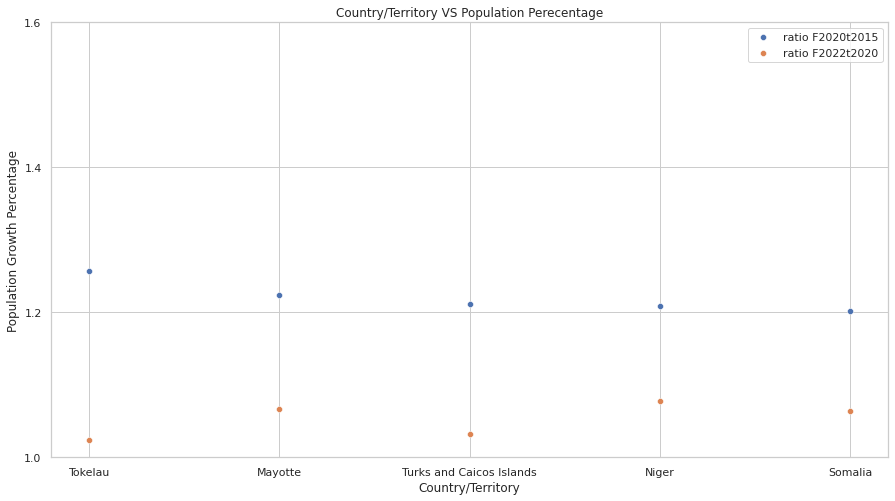

In [129]:
top_five_cont = wp_sorted.sort_values(["ratio F2022t2015","ratio F2022t2020"], ascending=[False,False]).head(5)

#plot for countries with increase population comparison from 15 to 22 and 20 to 22

plt.figure(figsize=(15, 8))
sns.scatterplot(x=top_five_cont["Country/Territory"], y=top_five_cont["ratio F2020t2015"])
sns.scatterplot(x=top_five_cont["Country/Territory"], y=top_five_cont["ratio F2022t2020"])
plt.legend(top_five_cont[["ratio F2020t2015","ratio F2022t2020"]])

plt.title("Country/Territory VS Population Perecentage")
plt.xlabel('Country/Territory')
plt.ylabel('Population Growth Percentage')
plt.yticks(np.arange(1, 1.8, step=0.2))
plt.show()

* Tokelau had the highest percentage from 2015 to 2020 then this changed as the percentage dropped down significantly.
* Mayotte had the second highest percentage from 2015 to 2020 then dropped but not that much.
* Turks had a high percentage from 2015 to 2020 then dropped alot as you can see, also i was amazed how an island got that much percentage between 2015 & 2020.
* Niger had somehow mid percentage according to the others from 2015 to 2020 , but it destroyed that percentage and got the highest percentage from 2020 to 2022.
* Somalia had somehow low percentage according to the others from 2015 to 2020 , but somehow their population percentage from 2020 to 2022 is pretty high if we took in our mind how small is Somalia is infront China for example.

According to google there's 148 million km² of land which represents 29% of Earth but governments , UN and other organizations states that human number is so big that earth in the future won't stand a chance in enduring that massive number so lets check it out.

In [130]:
print(wp_sorted["2022 Population"].sum())
print(wp_sorted["Area (km²)"].sum())

7973413042
136059156


That's 8 Billion human living on 136 million km² , so yeah we are really getting overpopulated as the statistics say.